<a href="https://colab.research.google.com/github/ajaysuseel/PyTorch-start/blob/main/Copy_of_ciFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###IMAGE PROCESSING

In [ ]:
import requests

# URL of the image
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToEOS614v9QCgeZi2cyraQFcB9d2jl2mdqFA&s"

# File name to save the image
output_file = "image.jpg"

# Download and save the image
response = requests.get(image_url, stream=True)
if response.status_code == 200:
    with open(output_file, "wb") as file:
        for chunk in response.iter_content(1024):
            file.write(chunk)
    print(f"Image downloaded successfully as {output_file}")
else:
    print(f"Failed to download image. Status code: {response.status_code}")


Image downloaded successfully as image.jpg


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms

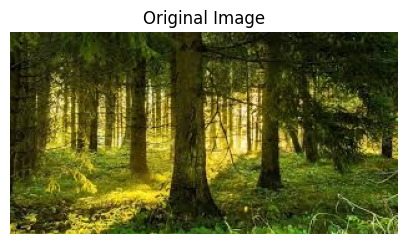

In [ ]:
# image_path = "image.jpg"  # Replace with your image file path
image_path = "image.jpg"
image = Image.open(image_path)

plt.figure(figsize=(5, 5))
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")
plt.show()


In [ ]:
transform_to_tensor = transforms.ToTensor()
image_tensor = transform_to_tensor(image)

In [ ]:
print (image_tensor)
print (image_tensor.shape)

tensor([[[0.1529, 0.1686, 0.1804,  ..., 0.1412, 0.1333, 0.1216],
         [0.1412, 0.1765, 0.2078,  ..., 0.1569, 0.1529, 0.1451],
         [0.1725, 0.1804, 0.1961,  ..., 0.1765, 0.1804, 0.1765],
         ...,
         [0.6784, 0.2784, 0.3569,  ..., 0.4706, 0.4314, 0.3569],
         [0.6510, 0.5725, 0.6000,  ..., 0.6235, 0.4314, 0.6275],
         [0.5529, 0.6392, 0.6980,  ..., 0.6196, 0.5686, 0.6314]],

        [[0.1922, 0.2078, 0.2078,  ..., 0.2039, 0.1961, 0.1843],
         [0.1843, 0.2196, 0.2392,  ..., 0.2235, 0.2196, 0.2118],
         [0.2157, 0.2235, 0.2275,  ..., 0.2431, 0.2471, 0.2431],
         ...,
         [0.6000, 0.2078, 0.2902,  ..., 0.5216, 0.4824, 0.4078],
         [0.5961, 0.5255, 0.5569,  ..., 0.7020, 0.5059, 0.7020],
         [0.5137, 0.6000, 0.6588,  ..., 0.7020, 0.6510, 0.7137]],

        [[0.0471, 0.0627, 0.0745,  ..., 0.0510, 0.0431, 0.0314],
         [0.0275, 0.0627, 0.0941,  ..., 0.0588, 0.0549, 0.0471],
         [0.0510, 0.0588, 0.0745,  ..., 0.0706, 0.0745, 0.

In [ ]:
def disp_tensor(tensor):
    img = transforms.ToPILImage()(tensor)
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

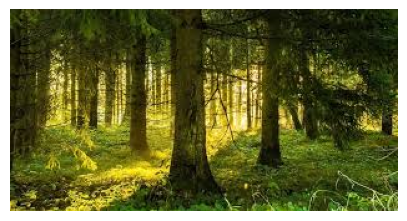

In [ ]:
disp_tensor(image_tensor)

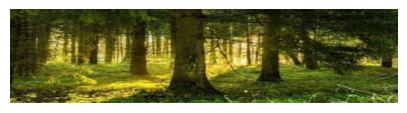

In [ ]:
transform = transforms.Compose([   # used for multiple transforms
    transforms.Resize((128, 528)), # Resize to 128x128
    transforms.ToTensor()          # Convert to PyTorch tensor
])

image_tensor_resized = transform(image)
disp_tensor(image_tensor_resized)

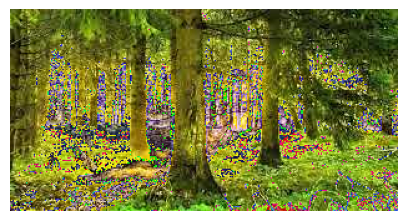

In [ ]:
normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
image_normalized = normalize(image_tensor)
disp_tensor(image_normalized)

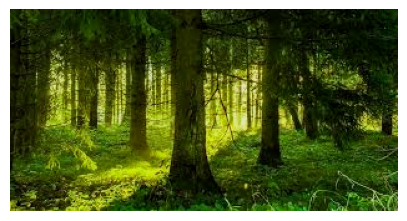

In [ ]:
jitter = transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
image_jittered = jitter(image_tensor)

disp_tensor(image_jittered)

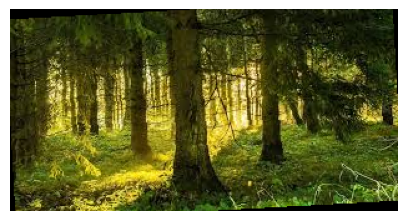

In [ ]:

compose_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=135), # Rotate up to 30 degrees
])


image_composed = compose_transform(image_tensor)
disp_tensor(image_composed)

# Imports

Let's start with out imports. We import a bounch of things from torch, some utils and some data for plotting.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Loading and preparing the data

Load the data from disk, we will use the available PyTorch functionality for this.

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.49139968, 0.48215827 ,0.44653124), (0.24703233,0.24348505,0.26158768))])
dataset =  torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data',
                                        train=False,
                                        download=True,
                                        transform=transform)


100%|██████████| 170M/170M [00:02<00:00, 64.0MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Split the train data into train and validate, create data loaders and define the classes and the batch size constant.

In [ ]:
BATCH_SIZE = 64 # no of images handled as input simultaneously for overall learning

# Split the training data into training and validation sets
train_size = int(0.8 * len(dataset))  # 80% for training
val_size = len(dataset) - train_size  # 20% for validation
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create data loaders for training, validation, and testing
trainLoader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valLoader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
testLoader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

# Define the classes (CIFAR-10 has 10 classes)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
len(trainLoader)

625

# Display some of the images
Display some of the pictures, to verify everything is ok, and also it will make some good plots :)

First let's display the first batch of 200 images from the training set.

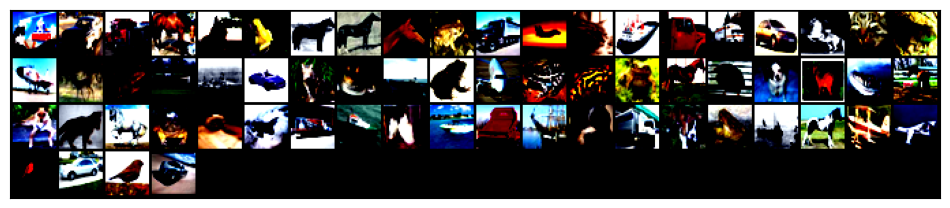

In [ ]:
for images, labels in trainLoader:
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=20).permute(1, 2, 0))
    break

Now let's display a few of the images a little bigger, also with a their lable as a title.

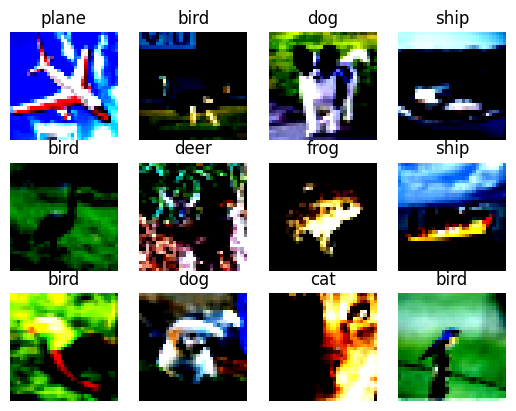

In [ ]:
for i in range(0, 12):
    img, label = train_dataset[i]
    plt.subplot(3,4,i+1)
    plt.title(classes[label])
    plt.axis('off')
    plt.imshow(img.permute(1, 2, 0))

As you can see this is a pretty hard problem, as many of the images are hard for even a human. CNNs to the rescue!

In [ ]:
import torch.nn as nn

def conv2d_function(input_tensor):
  conv_layer = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1,stride=1)
  output_tensor = conv_layer(input_tensor)
  return output_tensor

x= torch.randn(3,32,32)
y=conv2d_function(x)
print(y.shape)

torch.Size([64, 32, 32])


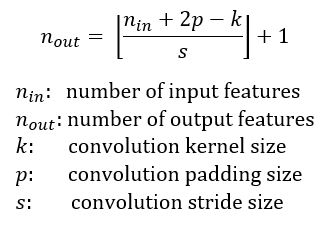

# Creating the CNN Classification Model class

We will define a class that will serve as our classification model. We will levarage the functionality provided to us by PyTorch.

In [ ]:
import torch
import torch.nn as nn

class Cifar10ClassifierShapeCheck(nn.Module):
    def __init__(self):
        super().__init__()

        # Define the layers individually
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1, stride=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1, stride=1)
        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1, stride=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1, stride=1)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1, stride=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1, stride=1)
        self.pool3 = nn.MaxPool2d(2, 2)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(256 * 4 * 4, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)

        self.relu = nn.ReLU()

    def forward(self, x):
        print(f"Input shape: {x.shape}")

        x = self.conv1(x)
        print(f"After conv1: {x.shape}")
        x = self.relu(x)

        x = self.conv2(x)
        print(f"After conv2: {x.shape}")
        x = self.relu(x)
        x = self.pool1(x)
        print(f"After pool1: {x.shape}")

        x = self.conv3(x)
        print(f"After conv3: {x.shape}")
        x = self.relu(x)

        x = self.conv4(x)
        print(f"After conv4: {x.shape}")
        x = self.relu(x)
        x = self.pool2(x)
        print(f"After pool2: {x.shape}")

        x = self.conv5(x)
        print(f"After conv5: {x.shape}")
        x = self.relu(x)

        x = self.conv6(x)
        x = self.relu(x)
        x = self.pool3(x)
        print(f"After pool3: {x.shape}")

        x = self.flatten(x)
        print(f"After flatten: {x.shape}")

        x = self.fc1(x)
        print(f"After fc1: {x.shape}")
        x = self.relu(x)

        x = self.fc2(x)
        x = self.relu(x)

        x = self.fc3(x)
        print(f"After fc3: {x.shape}")

        return x


In [ ]:
model = Cifar10ClassifierShapeCheck()
x= torch.randn(1, 3, 32, 32)
y=model(x)
y.shape

Input shape: torch.Size([1, 3, 32, 32])
After conv1: torch.Size([1, 32, 32, 32])
After conv2: torch.Size([1, 64, 32, 32])
After pool1: torch.Size([1, 64, 16, 16])
After conv3: torch.Size([1, 128, 16, 16])
After conv4: torch.Size([1, 128, 16, 16])
After pool2: torch.Size([1, 128, 8, 8])
After conv5: torch.Size([1, 256, 8, 8])
After pool3: torch.Size([1, 256, 4, 4])
After flatten: torch.Size([1, 4096])
After fc1: torch.Size([1, 1024])
After fc3: torch.Size([1, 10])


torch.Size([1, 10])

In [ ]:
class Cifar10Classifier(nn.Module):
    def __init__(self):
        super().__init__()

        # Define the layers individually
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1, stride=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1, stride=1)
        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1, stride=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1, stride=1)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1, stride=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1, stride=1)
        self.pool3 = nn.MaxPool2d(2, 2)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(256 * 4 * 4, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)

        self.relu = nn.ReLU()

    def forward(self, x):

        x = self.conv1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool1(x)

        x = self.conv3(x)
        x = self.relu(x)

        x = self.conv4(x)
        x = self.relu(x)
        x = self.pool2(x)

        x = self.conv5(x)
        x = self.relu(x)

        x = self.conv6(x)
        x = self.relu(x)
        x = self.pool3(x)

        x = self.flatten(x)

        x = self.fc1(x)
        x = self.relu(x)

        x = self.fc2(x)
        x = self.relu(x)

        x = self.fc3(x)

        return x

In [ ]:
model=Cifar10Classifier()

# Training the CNN classification model

We will first define an evaluation method, a train method and then we will train our model.

In [ ]:
model = Cifar10Classifier()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training and validation loop
num_epochs = 2
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0
    for images, labels in trainLoader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(trainLoader)

    # Validation phase
    model.eval()
    val_loss = 0
    val_accuracy = 0
    with torch.no_grad():
        for images, labels in valLoader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = F.cross_entropy(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)
            val_accuracy += (preds == labels).float().mean().item()

    val_loss /= len(valLoader)
    val_accuracy /= len(valLoader)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

KeyboardInterrupt: 

In [ ]:
model.eval()
test_loss = 0
test_accuracy = 0
with torch.no_grad():
    for images, labels in testLoader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = F.cross_entropy(outputs, labels)
        test_loss += loss.item()
        _, preds = torch.max(outputs, dim=1)
        test_accuracy += (preds == labels).float().mean().item()

test_loss /= len(testLoader)
test_accuracy /= len(testLoader)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")